In [21]:
#Estudo de caso 5 do curso de Introduação à Ciência de Dados Aplicada à Cibersegurança

#Importando bibliotecas básicas

import numpy as np # vetores e matrizes 
import pandas as pd # processamento dos dados, arquivo CSV I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
# Importando a base de dados para o pandas

sms = pd.read_csv("spam.csv", encoding = "ISO-8859-1", usecols=[0,1], skiprows=1,
                  names=["label", "message"])
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
sms.label = sms.label.map({"ham":0, "spam":1})

In [24]:
# mais casos negativos (ham) que positivos (spams) 
sms.label.value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [25]:
#Dividindo a base em treino e teste
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(sms.message, 
                                                                            sms.label, 
                                                                            test_size=0.2)

In [26]:
# Criando o documento de treino

from sklearn.feature_extraction.text import CountVectorizer

couvec = CountVectorizer()
couvec.fit(features_train)

CountVectorizer()

In [27]:
# número de características ou tokens
trained_features = couvec.get_feature_names_out()
print("Número de características vetorizadas:", len(trained_features))
print("Exemplos de características treinadas:", trained_features[1:10])

Número de características vetorizadas: 7769
Exemplos de características treinadas: ['000' '008704050406' '0121' '01223585236' '01223585334' '0125698789' '02'
 '0207' '02072069400']


In [28]:
# tokenized train documents

dtm_train = couvec.fit_transform(features_train)
print("Shape of dtm_train:", dtm_train.shape)
print(dtm_train[0:2]) # first two rows of sparse matrix

Shape of dtm_train: (4457, 7769)
  (0, 878)	1
  (0, 922)	1
  (0, 5034)	1
  (0, 2697)	1
  (0, 4964)	1
  (0, 2497)	1
  (0, 757)	1
  (0, 4459)	1
  (0, 6091)	1
  (0, 3377)	1
  (0, 5748)	2
  (0, 2879)	1
  (0, 6920)	1
  (0, 6298)	2
  (0, 2789)	1
  (0, 4287)	1
  (0, 4855)	1
  (0, 7600)	1
  (0, 3559)	1
  (0, 3214)	1
  (0, 1225)	1
  (0, 1581)	1
  (0, 7212)	1
  (0, 6606)	1
  (0, 860)	1
  (0, 3110)	1
  (1, 4941)	1
  (1, 5067)	1
  (1, 4859)	1
  (1, 5460)	1


In [29]:
# tokenized test documents

dtm_test = couvec.transform(features_test)
print("Shape of dtm_test:", dtm_test.shape)

Shape of dtm_test: (1115, 7769)


In [30]:
# Construíndo e avaliando o modelo 

# Multimodal Naive Bayes 
# O classificador multimodal Naive Bays é útil para classificar características discretas. 
# (e.g., número de palavras para classificação de textos). 
# A distribuição multimodal requer geralmente contadores inteiros como features.

# Importando e instanciando o modelo Nayve Bayes Multimodal
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [31]:
# Treinando o modelo

nb.fit(dtm_train, labels_train)

MultinomialNB()

In [32]:
# Fazendo predições

labels_pred = nb.predict(dtm_test)

In [33]:
# Acurácia
from sklearn import metrics
metrics.accuracy_score(labels_test, labels_pred)

0.9847533632286996

In [34]:
# Criando a matrix de confusão para precisão e recall (essas são duas outrss métricas de avaliação) 
metrics.confusion_matrix(labels_test, labels_pred)

array([[966,   5],
       [ 12, 132]])

In [35]:
# Percentagem do total de spams detectados i.e.recall
print("Recall:", metrics.recall_score(labels_test, labels_pred))

# Percentagem das predições positivas (spams) corretas, i.e. precisão
print("Precisão:", metrics.precision_score(labels_test, labels_pred))

Recall: 0.9166666666666666
Precisão: 0.9635036496350365


In [36]:
print("Ordem das classes no predict_proba:", nb.classes_)
print("Exemplos de probabilidades de classes:", nb.predict_proba(dtm_test)[0])


Ordem das classes no predict_proba: [0 1]
Exemplos de probabilidades de classes: [9.99870548e-01 1.29451948e-04]


In [37]:
# Uma vez que somente ~15% dos rótulos são positivos (spam), a curva precisão-recall é mais informativa que
# a curva ROC

labels_prob = nb.predict_proba(dtm_test)[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(labels_test, labels_prob)

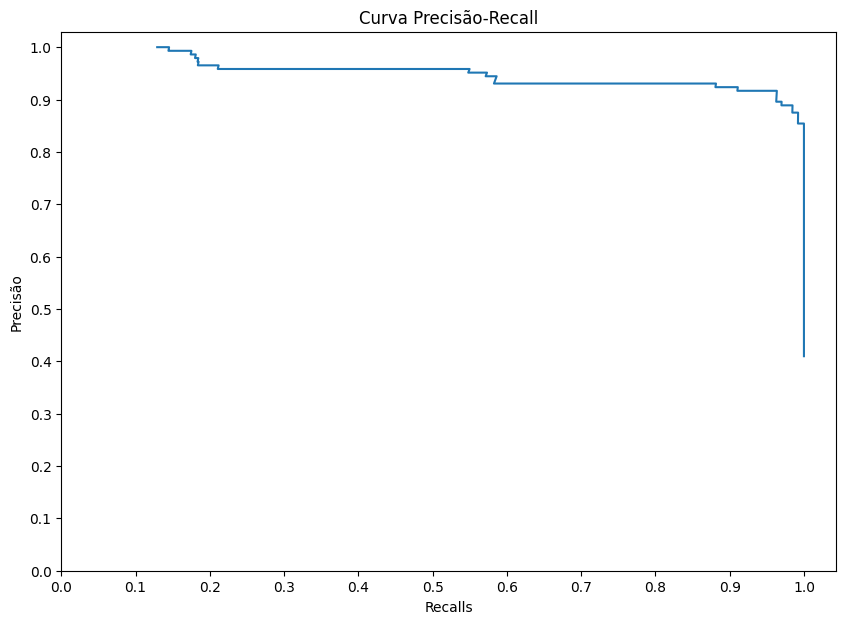

In [38]:
# Plotando a curva precisão-recall 

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(precisions[:-1], recalls[:-1])
plt.xlabel("Recalls")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Precisão")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Curva Precisão-Recall")
plt.show()